In [1]:
import numpy as np
import cv2
import random
import pandas as pd
import time


import matplotlib.pyplot as plt
from seaborn import load_dataset

In [2]:
path= '../Alejandro_Proyectos/'
pathReferencia ='Imagenes Originales Gris/lena_gray.png'
pathRuido='lena/lena_gray_512_512_variance_400.png'
imagenReferencia = cv2.imread(path+pathReferencia)
imagenReferenciaGris = cv2.cvtColor(imagenReferencia, cv2.COLOR_RGB2GRAY)
imagenRuido = cv2.imread(path+pathRuido)
imagenRuidoGris = cv2.cvtColor(imagenRuido, cv2.COLOR_RGB2GRAY)
areaBusqueda = 21
tamañoParche = 8
split_punto = pathRuido.split(".")
split_guion = split_punto[0].split("_")
varianzaOriginal = int(split_guion[len(split_guion)-1])

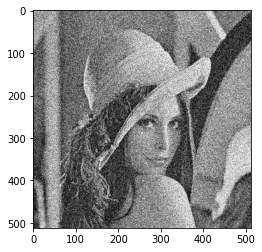

In [3]:
plt.imshow(cv2.cvtColor(imagenRuidoGris, cv2.COLOR_BGR2RGB))
plt.show()

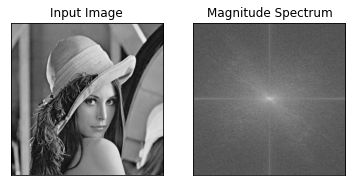

True

In [4]:
imgD64 = np.float64(imagenReferenciaGris)
#print(imgD64)
Fourier = np.fft.fft2(imgD64)
#print(Fourier)
FourierShift = np.fft.fftshift(Fourier)
#print(FourierShift)
magnitude_spectrum = 20*np.log(np.abs(FourierShift))

#cv2_imshow(img_noise_400_grey)
#print('\n')
#cv2_imshow(magnitude_spectrum)
plt.subplot(121),plt.imshow(imagenReferenciaGris, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('Fourier_Lenna.png', magnitude_spectrum)

[[226. 118. 179. 179. 237. 165. 169. 121.]
 [120. 133. 175. 199. 213. 213. 141. 122.]
 [174.  65. 152. 199. 137.  93. 192. 201.]
 [109. 178. 146. 211. 238. 123. 184. 250.]
 [137. 141. 177. 228. 206. 162. 233. 240.]
 [ 79. 123. 153. 184. 184.  35. 255. 130.]
 [197. 131. 213. 160. 156.  76. 166. 171.]
 [199. 140.  67. 194. 172. 186. 113. 132.]] Pixeles
[[  506.          +0.j           253.45227279-239.57211383j
    -91.        -257.j           342.54772721 -13.57211383j
    300.          +0.j           342.54772721 +13.57211383j
    -91.        +257.j           253.45227279+239.57211383j]
 [  410.75588002 -45.12846302j    19.58578644 -40.254834j
   -188.43712088 -94.60869376j  -100.82546853 +51.83347776j
    -85.45227279+346.20667351j   236.47308807-106.372583j
     77.26136393 +91.63813101j  -398.40916293-296.49956672j]
 [  -81.        +367.j          -108.76598128  +8.61879503j
     78.        -152.j          -358.55486989-251.53048327j
    435.        -183.j          -175.23401872 -94

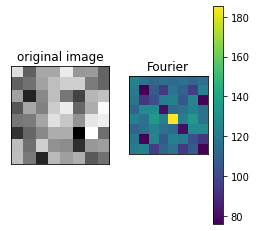

In [5]:
imagenReferenciaFourier = imagenRuidoGris[0:0+8, 0: 0+8]
img1_Fourier = imagenReferenciaFourier.astype('float')
print(img1_Fourier,'Pixeles')
#C_temp = np.zeros(imagenReferencia.shape)
#dst = np.zeros(imagenReferencia.shape)

#imgD64 = np.float64(imagenReferenciaGris)
#print(imgD64)
Fourier = np.fft.fft2(img1_Fourier)
#print(Fourier)
FourierShift = np.fft.fftshift(Fourier)
print(FourierShift,'Fourier_Shift')
#print(FourierShift)

realFourierData = np.zeros((len(imagenReferenciaFourier), len(imagenReferenciaFourier)))

for i in range(len(realFourierData)):
    for j in range(len(realFourierData)):
        realFourierData[i,j] = FourierShift[i,j].real

print(realFourierData,'Fourier_Real_Part')

magnitude_spectrum = 20*np.log(np.abs(FourierShift))
print(magnitude_spectrum,'Fourier_espectro')

plt.subplot(131)
plt.imshow(img1_Fourier, 'gray')
plt.title('original image')
plt.xticks([]), plt.yticks([])
 
plt.subplot(132)
plt.imshow(magnitude_spectrum)
plt.colorbar()
plt.title('Fourier')
plt.xticks([]), plt.yticks([])

plt.show()

In [6]:
def transformadaFourier(img1):
    img1_Fourier = img1.astype('float')
    #print(img1_Fourier,'Pixeles')
    Fourier = np.fft.fft2(img1_Fourier)
    #print(Fourier)
    FourierShift = np.fft.fftshift(Fourier)
    #print(FourierShift,'Fourier_Shift')
    #print(FourierShift)

    realFourierData = np.zeros((len(img1), len(img1)))

    for i in range(len(realFourierData)):
        for j in range(len(realFourierData)):
            realFourierData[i,j] = FourierShift[i,j].real

    #print(realFourierData,'Fourier_Real_Part')
    
    return realFourierData

In [14]:
transformadaFourier(imagenRuidoGris[0:0+8, 0: 0+8])

array([[  506.        ,   253.45227279,   -91.        ,   342.54772721,
          300.        ,   342.54772721,   -91.        ,   253.45227279],
       [  410.75588002,    19.58578644,  -188.43712088,  -100.82546853,
          -85.45227279,   236.47308807,    77.26136393,  -398.40916293],
       [  -81.        ,  -108.76598128,    78.        ,  -358.55486989,
          435.        ,  -175.23401872,   136.        ,    10.55486989],
       [   81.24411998,   580.82546853,   522.73863607,    22.41421356,
         -174.54772721,  -197.59083707,   316.43712088,   301.52691193],
       [  496.        ,  -152.80046917,    69.        ,  -451.19953083,
        10502.        ,  -451.19953083,    69.        ,  -152.80046917],
       [   81.24411998,   301.52691193,   316.43712088,  -197.59083707,
         -174.54772721,    22.41421356,   522.73863607,   580.82546853],
       [  -81.        ,    10.55486989,   136.        ,  -175.23401872,
          435.        ,  -358.55486989,    78.        ,  -

In [11]:
def algoritmoBJTFD(posicionAltoImagenActual,posicionAnchoImagenActual,imgAct,imgRuido,areaBus,tamParche):
#     imagenActualFiltro = transformadaCosenoDiscreta(imgAct)
#     imagenRuidoFiltro = transformadaCosenoDiscreta(imgRuido)

    imagenActual = imgAct[posicionAltoImagenActual:posicionAltoImagenActual+tamParche, posicionAnchoImagenActual: posicionAnchoImagenActual+tamParche]
    imagenActualTFD = transformadaFourier(imagenActual)
    dh1 = pd.DataFrame(columns=['ssd', 'coordenada_x', 'coordenada_y'])
    for m in range(posicionAltoImagenActual,posicionAltoImagenActual+areaBus-tamParche+1):
        for n in range(posicionAnchoImagenActual,posicionAnchoImagenActual+areaBus-tamParche+1):
            imagenReferencia = imgRuido[m:m+tamParche, n: n+tamParche]
            imagenReferenciaTFD = transformadaFourier(imagenReferencia)
            lenParche=6 
            ssd=0
            for rx_Pache in range (2,lenParche):
                for ry_Pache in range (2,lenParche):
                    resta = int(imagenActualTFD[rx_Pache,ry_Pache])-int(imagenReferenciaTFD[rx_Pache,ry_Pache])
                    ssd += resta**2
#                     ssd += np.sum(np.power((imagenActualTCD[rx_Pache,ry_Pache]-imagenReferenciaTCD[rx_Pache,ry_Pache]),2))
            auxi = [ssd, m, n]
            dh2 = pd.DataFrame([auxi], columns=['ssd', 'coordenada_x', 'coordenada_y'])
            dh1= pd.concat([dh1, dh2], ignore_index=True)
#     print(posicionAltoImagenActual,posicionAnchoImagenActual)
    by_ascending_ssd = dh1.sort_values('ssd',ascending=True)
    by_ascending_ssd = by_ascending_ssd.reset_index(drop=True)
    by_ascending_ssd = by_ascending_ssd.astype(int)
    #by_ssd.head()
#     print(by_ascending_ssd)
    
    ##Aquí comienza la segunda etapa
    dhFefinitive = pd.DataFrame(columns=['ssd', 'coordenada_x', 'coordenada_y'])
    for iteraLista in range(0,8):
        Alto_x = by_ascending_ssd['coordenada_x'][iteraLista]
        Alto_y = by_ascending_ssd['coordenada_y'][iteraLista]
        imagenReferenciaDos = imgRuido[Alto_x:Alto_x+tamParche, Alto_y: Alto_y+tamParche]
        imagenReferenciaDosTFD = transformadaFourier(imagenReferenciaDos)
        ssd=0
        lenParche = 7
        for i in range (2,lenParche):
            for j in range (2,lenParche):
                resta = int(imagenActualTFD[i,j])-int(imagenReferenciaDosTFD[i,j])
                ssd += resta**2
#                 ssd += np.sum(np.power((imagenActualTCD[i,j]-imagenReferenciaDosTCD[i,j]),2))
        auxi2 = [ssd, Alto_x, Alto_y]
        dhFefinitive2 = pd.DataFrame([auxi2], columns=['ssd', 'coordenada_x', 'coordenada_y'])
        dhFefinitive= pd.concat([dhFefinitive, dhFefinitive2], ignore_index=True)
    by_ascending_dhFefinitive = dhFefinitive.sort_values('ssd', ascending=True)
    by_ascending_dhFefinitive = by_ascending_dhFefinitive.reset_index(drop=True)
    by_ascending_dhFefinitive = by_ascending_dhFefinitive.astype(int)
#     print(by_ascending_dhFefinitive)
    posicionAltoImagenReferencia = by_ascending_dhFefinitive['coordenada_x'][0]
    posicionAnchoImagenReferencia = by_ascending_dhFefinitive['coordenada_y'][0]
    
    return posicionAltoImagenReferencia,posicionAnchoImagenReferencia

In [12]:
pxy_pref_BJTFD = pd.DataFrame(columns=['coordenada_x', 'coordenada_y','referencia_x','referencia_y',])
altoImagen = 30 #imagenReferenciaGris.shape[0]
anchoImagen = 30 #imagenReferenciaGris.shape[1]

for posicionAlto in range(0,altoImagen-areaBusqueda): # altoImagen-areaBusqueda
    for posicionAncho in range(0,anchoImagen-areaBusqueda): # anchoImagen-areaBusqueda
        posicionAltoImagenReferencia,posicionAnchoImagenReferencia = algoritmoBJTFD(posicionAlto,posicionAncho,imagenReferenciaGris,imagenRuidoGris,areaBusqueda,tamañoParche)
        auxi3 = [posicionAlto, posicionAncho, posicionAltoImagenReferencia,posicionAnchoImagenReferencia]
        pxy_pref_BJTFD2 = pd.DataFrame([auxi3], columns=['coordenada_x', 'coordenada_y','referencia_x','referencia_y'])
        pxy_pref_BJTFD = pd.concat([pxy_pref_BJTFD, pxy_pref_BJTFD2], ignore_index=True)
    
    
pxy_pref_BJTFD

,coordenada_x,coordenada_y,referencia_x,referencia_y
0,0,0,13,5
1,0,1,13,5
2,0,2,13,5
3,0,3,13,5
4,0,4,13,5
...,...,...,...,...
76,8,4,13,5
77,8,5,13,5
78,8,6,18,14
79,8,7,14,11


In [13]:
suma = 0
miu = 0
for i in range(0,len(pxy_pref_BJTFD)-1):
    if pxy_pref_BJTFD['coordenada_x'][i] == pxy_pref_BJTFD['referencia_x'][i] and pxy_pref_BJTFD['coordenada_y'][i] == pxy_pref_BJTFD['referencia_y'][i]:
        suma += 1

miu =  suma/(len(pxy_pref_BJTFD)-1)
miu
    

0.0